Kernel Visualization - Experiment

In [13]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
import numpy as np
import matplotlib.pyplot as plt

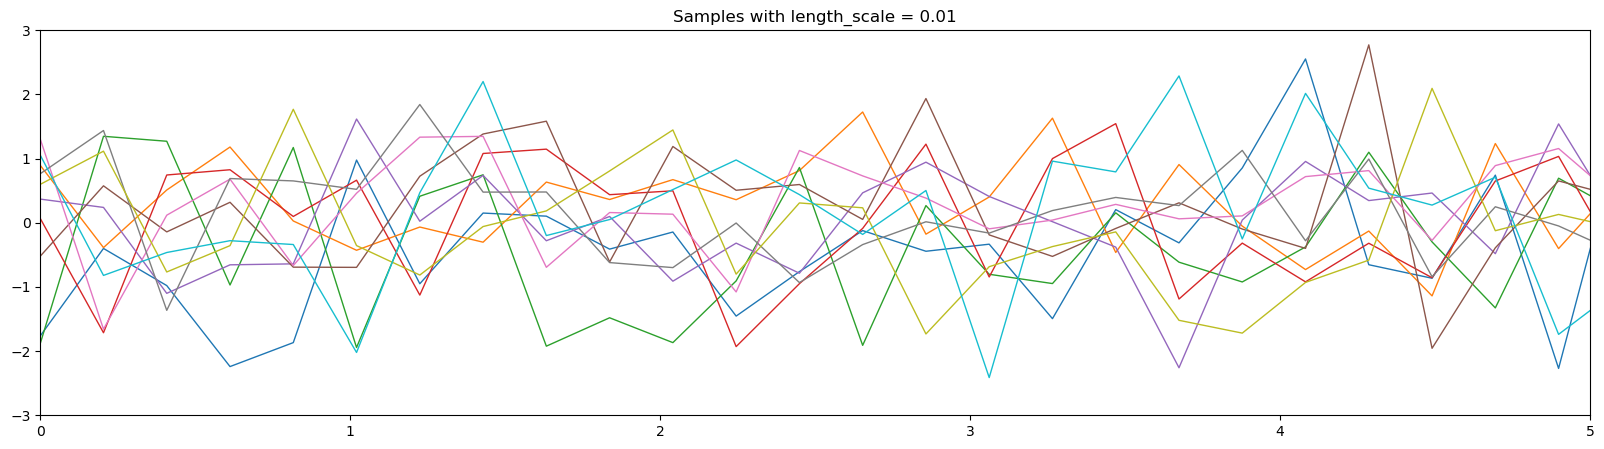

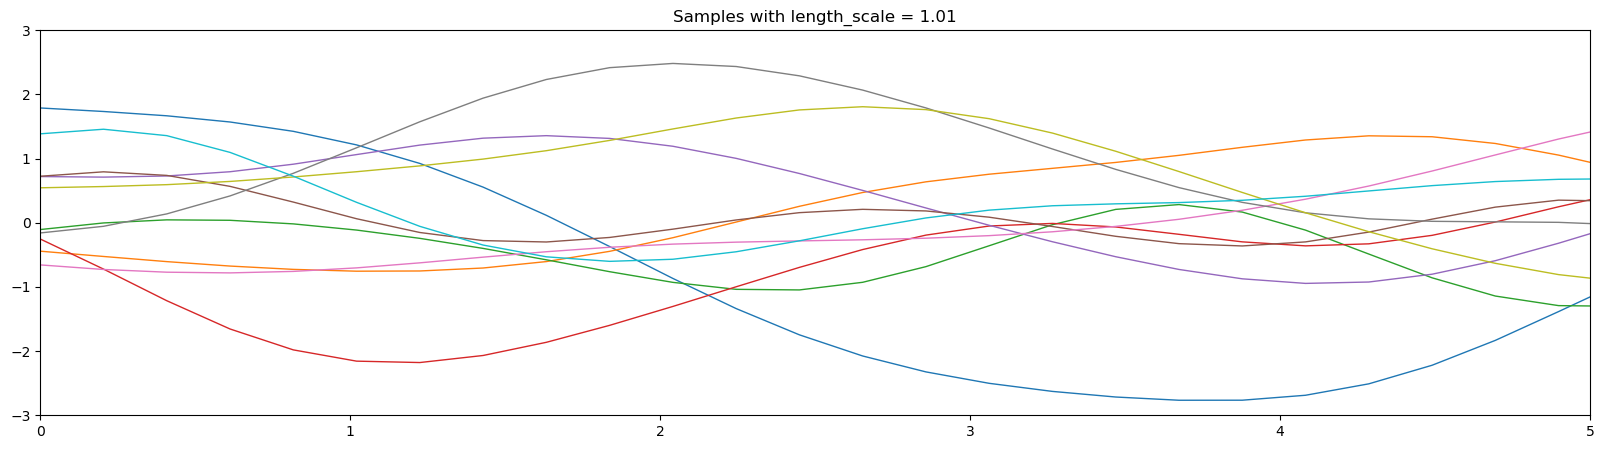

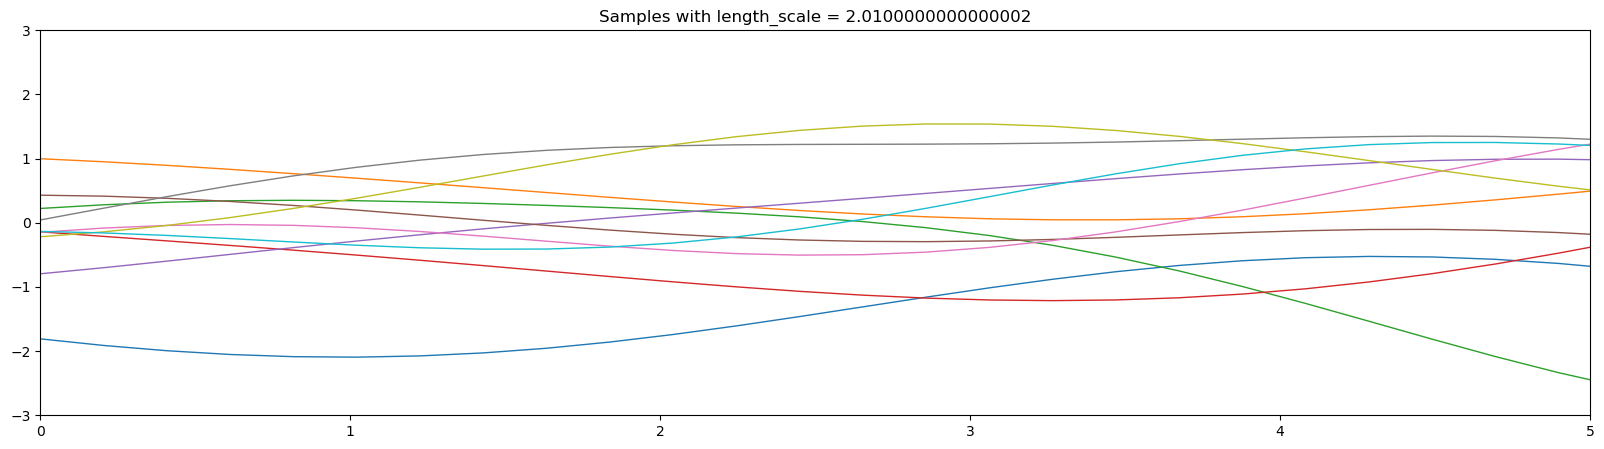

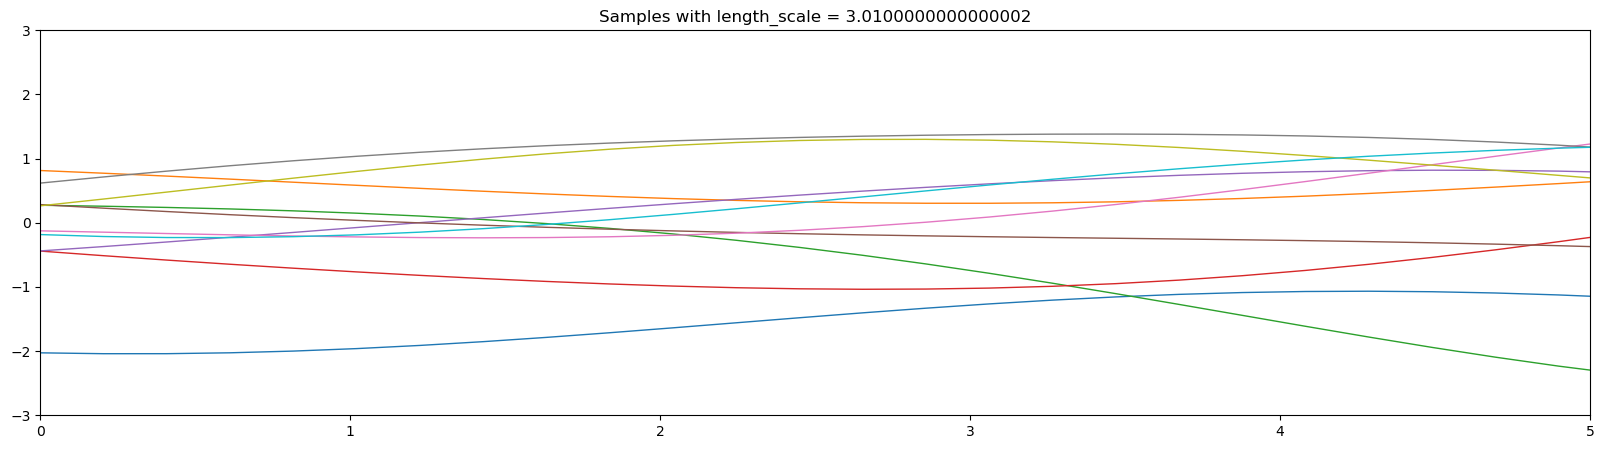

In [313]:
for i in range(1, 400, 100):
    kernel = 1.0 * RBF(length_scale=i*0.01)
    
    gp = GaussianProcessRegressor(kernel=kernel)
    
    X_ = np.linspace(0, 10, 50)
    
    # Generate random samples from X_ and predict
    y_samples = gp.sample_y(X_[:, np.newaxis], 10, random_state=0)
    plt.figure(figsize=(20, 5))
    plt.plot(X_, y_samples, lw=1)
    plt.xlim(0, 5)
    plt.ylim(-3, 3)
    plt.title("Samples with length_scale = {}".format(i*0.01))
    plt.show()



Why it behaves like this?

Sample paths from the piror of the RBF Kernel
$$K(x, x') = \exp\left(-\frac{1}{2} \left(\frac{x - x'}{l}\right)^2\right)$$

Therefore, with higher length_scale, Kernel gets closer to 1.

In [340]:
length_scale = 4
kernel = 1.0 * RBF(length_scale=length_scale)
gp = GaussianProcessRegressor(kernel=kernel)
N = 50
X_ = np.linspace(0, 10, N)
y_samples = gp.sample_y(X_[:, np.newaxis], 100000, random_state=0)
# plt.figure(figsize=(20, 5))
# plt.plot(X_, y_samples, lw=1)
# plt.title("Samples with length_scale = {}".format(i*0.01))
# plt.show()

In [345]:
def rbf_kernel(x, x_, length_scale):
    return np.exp(-0.5 * (x - x_)**2 / length_scale**2)

In [342]:
kernel_cov = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        kernel_cov[i, j] = rbf_kernel(X_[i], X_[j], length_scale) 

In [343]:
np.round(np.cov(y_samples) - kernel_cov, 2)

array([[-0.01, -0.01, -0.01, ..., -0.  , -0.  , -0.  ],
       [-0.01, -0.01, -0.01, ..., -0.  , -0.  , -0.  ],
       [-0.01, -0.01, -0.01, ..., -0.  , -0.  , -0.  ],
       ...,
       [-0.  , -0.  , -0.  , ...,  0.  ,  0.  ,  0.  ],
       [-0.  , -0.  , -0.  , ...,  0.  ,  0.  ,  0.  ],
       [-0.  , -0.  , -0.  , ...,  0.  ,  0.  ,  0.  ]])

In [365]:
results = []
for sample_N in [10, 100, 1000, 10000, 100000, 1000000]:
    for length_scale in  [0.01, 0.1, 0.5, 1, 2, 4, 8, 10]:
        kernel = 1.0 * RBF(length_scale=length_scale)
        gp = GaussianProcessRegressor(kernel=kernel)
        N = 50
        X_ = np.linspace(0, 10, N)
        y_samples = gp.sample_y(X_[:, np.newaxis], sample_N, random_state=0)    
        kernel_cov = np.zeros((N, N))
        for i in range(N):
            for j in range(N):
                kernel_cov[i, j] = rbf_kernel(X_[i], X_[j], length_scale)
        results.append({
            'sample_N': sample_N,
            'length_scale': length_scale,
            'cov_diff': np.abs(np.cov(y_samples) - kernel_cov).mean()
        })

In [366]:
import pandas as pd
# Create DataFrame from results
df = pd.DataFrame(results)

# Pivot the DataFrame
pivot_df = df.pivot(index='sample_N', columns='length_scale', values='cov_diff')

In [367]:
pivot_df

length_scale,0.01,0.10,0.50,1.00,2.00,4.00,8.00,10.00
sample_N,,,,,,,,
10,0.263895,0.256054,0.268174,0.304420,0.285949,0.256640,0.258649,0.263385
100,0.076570,0.076385,0.077800,0.080030,0.115225,0.116456,0.082974,0.071370
1000,0.025075,0.024998,0.024469,0.024403,0.024528,0.025008,0.017767,0.015036
10000,0.008119,0.007980,0.008934,0.010104,0.009009,0.011738,0.015230,0.015876
100000,0.002525,0.002551,0.002898,0.002434,0.002143,0.002489,0.002743,0.002824
1000000,0.000809,0.000811,0.000811,0.000763,0.000773,0.000833,0.000946,0.000985


As we can see from the table, the difference between the sample covariance and the kernel covariance decreases as the number of samples increases.